In [7]:
import sys
import os
import tempfile
import yaml
import json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import cProfile

from models.specie import Specie
from models.animal import Animal
from models.mapcell import MapCells
from models.environment import Environment
from models.predator_prey import PredatorPreySimulation
from models.evolutionary_species_simulation import EvolutionarySpeciesSimulation


# Predator-Prey Simulation

Welcome to the **Predator-Prey Simulation** notebook! This simulation explores the dynamic interactions between prey and predator populations on a two-dimensional grid. By adjusting parameters such as grid size, initial populations, and reproduction rates, you can observe how these factors influence the stability and fluctuations of both species over time.

## Mathematical Model

The interactions in this simulation are inspired by the classic **Lotka-Volterra equations**, which describe the population dynamics of predators and prey:

$$
\frac{dP}{dt} = \alpha P - \beta P C
$$
$$
\frac{dC}{dt} = \delta P C - \gamma C
$$

Where:
- $ P $ = Prey population
- $ C $ = Predator population
- $ \alpha $ = Prey birth rate
- $ \beta $ = Predation rate
- $ \delta $ = Predator reproduction rate per prey consumed
- $ \gamma $ = Predator death rate

In this grid-based simulation, these interactions are modeled through stochastic movements and probabilistic events, providing a spatial perspective on population dynamics.

## Features
- **Customizable Parameters:** Modify grid size, initial populations, and rate constants to explore different scenarios.
- **Real-Time Visualization:** Watch the spatial distribution and population trends evolve step-by-step.
- **Interactive Exploration:** Experiment with various settings to understand their impact on ecosystem stability.

## How to Use
1. **Set Parameters:** Adjust the simulation parameters in the `PredatorPreySimulation` class as desired.
2. **Run the Simulation:** Execute the simulation to visualize the interactions between predators and prey.
3. **Analyze Results:** Observe the animated grid and population graphs to gain insights into ecological dynamics.

Enjoy exploring the fascinating world of predator-prey interactions!



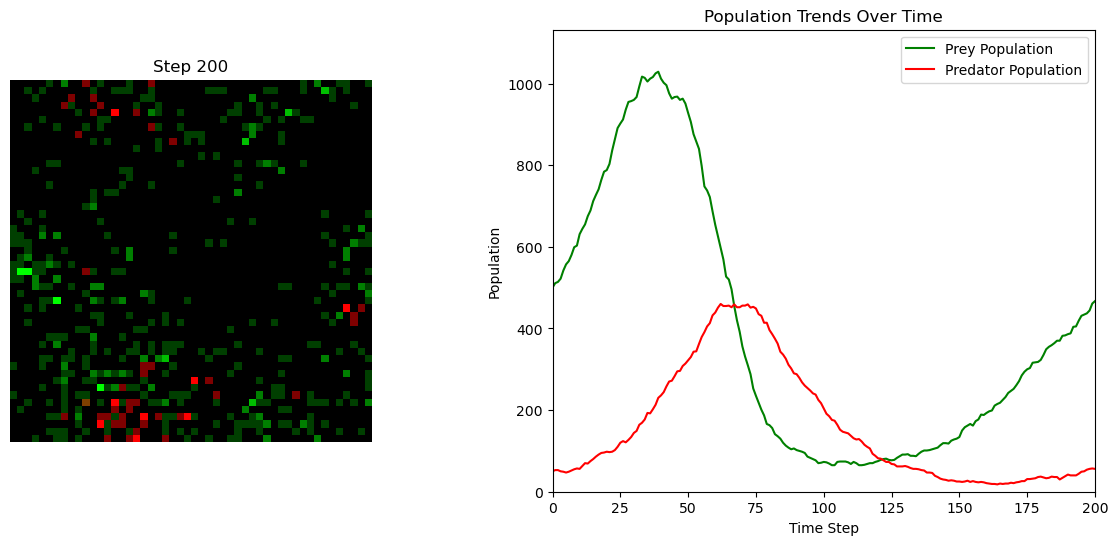

In [2]:
# Main execution
simulation = PredatorPreySimulation()
simulation.simulate()

# Evolutionary Species Simulation

Welcome to the **Evolutionary Species Simulation** notebook! This simulation models the interactions among multiple species within a two-dimensional grid environment. By adjusting species parameters and interaction coefficients, you can explore how different factors influence the evolution and population dynamics of each species over time.

## Mathematical Model

The simulation is based on an extension of the **Lotka-Volterra equations** to multiple species, incorporating interaction effects between them:

$$
\frac{dN_i}{dt} = \alpha_i N_i + \sum_{j=1}^{S} \beta_{ij} N_i N_j
$$

Where:
- $ N_i $ = Population of species $ i $
- $ \alpha_i $ = Intrinsic growth rate of species $ i $
- $ \beta_{ij} $ = Interaction coefficient between species $ i $ and $ j $
  - $ \beta_{ij} > 0 $: Species $ i $ benefits from species $ j $
  - $ \beta_{ij} < 0 $: Species $ i $ is harmed by species $ j $
- $ S $ = Total number of species

In this grid-based simulation, these interactions are modeled through stochastic movements and probabilistic events, providing a spatial perspective on multi-species dynamics.

## Features
- **Multiple Species Support:** Simulate interactions among various species with customizable parameters.
- **Custom Interaction Matrix:** Define how each species affects others through a user-defined interaction matrix.
- **Real-Time Visualization:** Observe the spatial distribution and population trends of all species as the simulation progresses.
- **Parameter Flexibility:** Adjust grid size, initial populations, birth/death rates, and interaction strengths to explore diverse ecological scenarios.

## How to Use
1. **Define Species Parameters:** Specify  in ![Alt Text](species/config_evolut_simulation.yaml) each species' name, initial population, birth rate, death rate, and visualization color.
2. **Set Interaction Matrix:** Create a matrix representing the interaction coefficients between species.
3. **Configure Simulation Settings:** Adjust grid size and the number of simulation steps as needed.
4. **Run the Simulation:** Execute the simulation to visualize and analyze the interactions and population changes over time.




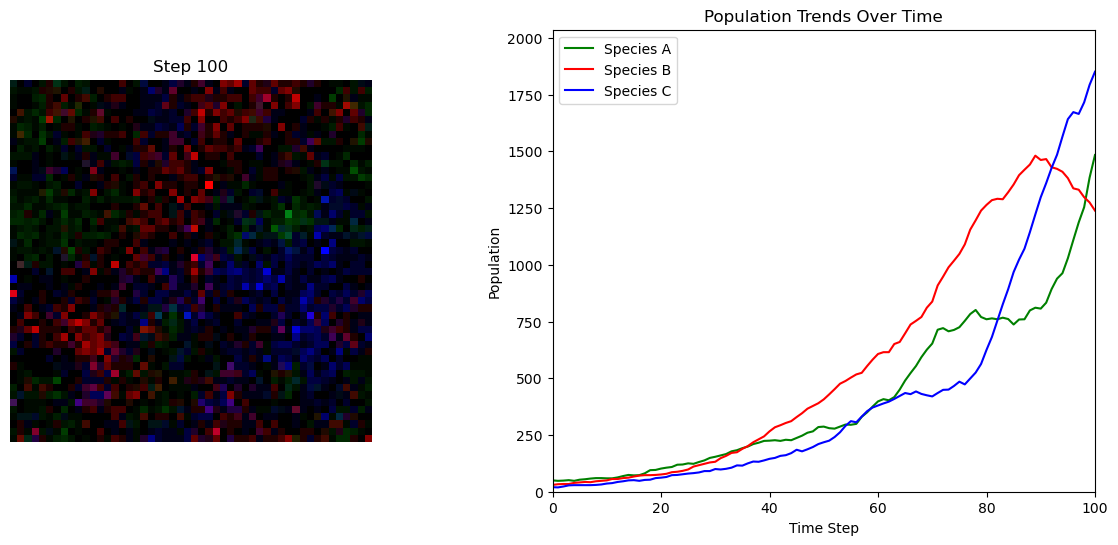

In [3]:
# Main execution
# Define species parameters
config_species = yaml.load(open('species/config_evolut_simulation.yaml', 'r'), Loader=yaml.FullLoader)
species_params = config_species["species"]
interaction_matrix = np.array(config_species["interaction_matrix"])


simulation = EvolutionarySpeciesSimulation(
    species_params=species_params,
    interaction_matrix=interaction_matrix,
    grid_size=50,
    steps=100
)
simulation.simulate()

# Reproducing Evolutionary Dynamics in a Real-World Scenario

In this section, we aim to **reproduce evolutionary dynamics** by simulating interactions between multiple species within a realistic environment. This simulation models how different species interact, compete, and evolve over time, reflecting real-world ecological dynamics.

## Simulation Workflow

The simulation consists of the following key steps:

1. **Initialize Map Cells**
2. **Create the Environment**
3. **Initialize Animal Populations**
4. **Run the Simulation**

## How to Use
1. **Define Species Parameters:** Specify  in ![Alt Text](species/config_species.yaml) each species' parameters 
2. **Set Interaction Matrix:** Create a matrix representing the interaction coefficients between species.
3. **Configure Simulation Settings:** Adjust grid size and the number of simulation steps as needed.
4. **Run the Simulation:** Execute the simulation to visualize and analyze the interactions and population changes over time.


In [8]:
config_species = yaml.load(open('species/config_species.yaml', 'r'), Loader=yaml.FullLoader)

# print(yaml.dump(config_species))

species = []

for config_specie in config_species["species"]:

    print(yaml.dump(config_specie))
    species_name = config_specie["name"]
    species.append(species_name)
    globals()[f"species_{species_name}"] = Specie(config_specie)

for specie in species:
    print(globals()[f"species_{specie}"].__dict__)

birth_energy_cost: 20
color: '#FF0000'
death_probability: 0.02
diet:
  Species2:
    eating_probability: 0.9
    energy: 20
    type: animal
energy_decay: 0.995
food_weight: 1.0
food_weight_multiplier: 2.0
gestation_period: 1
hunger_energy_penalty: 5.0
litter_size: 2
mating_weight: 1.0
max_age: 30
max_reproduction_age: 25
min_reproduction_age: 5
name: Species1
pack_size: 10
predators:
- Species2
reproduction_energy_threshold: 40
reproduction_probability: 0.5
speed: 6

birth_energy_cost: 20
color: '#00FF00'
death_probability: 0.02
diet:
  Species3:
    eating_probability: 0.9
    energy: 20
    type: animal
energy_decay: 0.995
food_weight: 1.0
food_weight_multiplier: 2.0
gestation_period: 1
hunger_energy_penalty: 5.0
litter_size: 2
mating_weight: 1.0
max_age: 30
max_reproduction_age: 25
min_reproduction_age: 5
name: Species2
pack_size: 10
predators:
- Species3
reproduction_energy_threshold: 40
reproduction_probability: 0.5
speed: 6

birth_energy_cost: 20
color: '#0000FF'
death_probabili

In [9]:
map_json = json.load(open('maps/map_2.json'))
map_settings = json.load(open('maps/settings_map_2.json'))


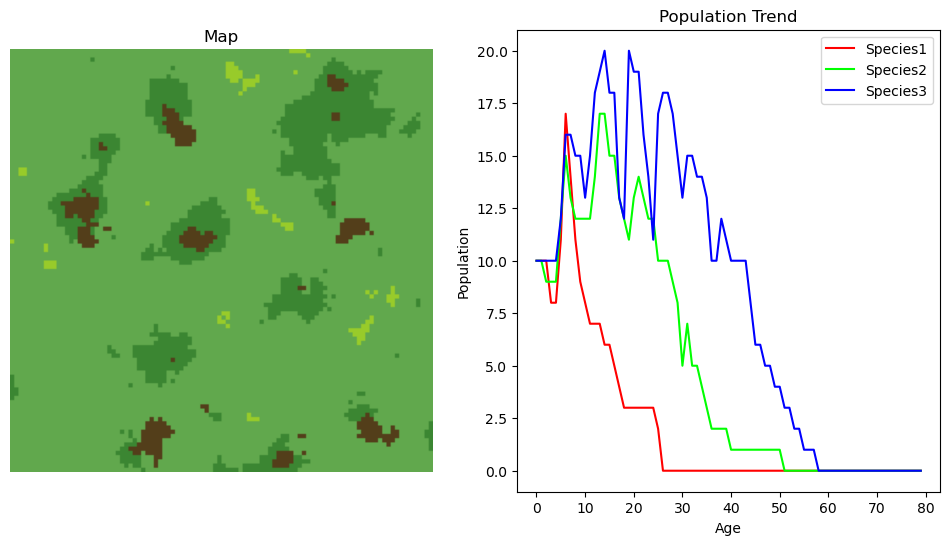

In [10]:
# Initialize MapCells
map_cells = MapCells(map_json, map_settings)

# Create the Environment
environment = Environment(map_cells)

# Initialize animals using the new initialization function
initial_population = config_species
environment.initialize_animals(config_species)

environment.simulate()
